In [9]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

In [10]:
import random
print(random.choice(range(255)))
color = [[random.choice(range(255))for _ in range(3)] for _ in range(15)] 
print(color)
print(color[1][1])


207
[[108, 136, 180], [76, 218, 228], [23, 147, 2], [150, 248, 199], [43, 12, 42], [134, 69, 195], [11, 84, 84], [72, 184, 132], [44, 230, 39], [82, 145, 180], [182, 57, 25], [160, 187, 208], [248, 187, 203], [117, 79, 104], [214, 228, 180]]
218


## train.json

In [11]:
import json

with open("datasets/train.json", "r") as st_json:
    data = json.load(st_json)

train/36.png
W = 640, H = 345


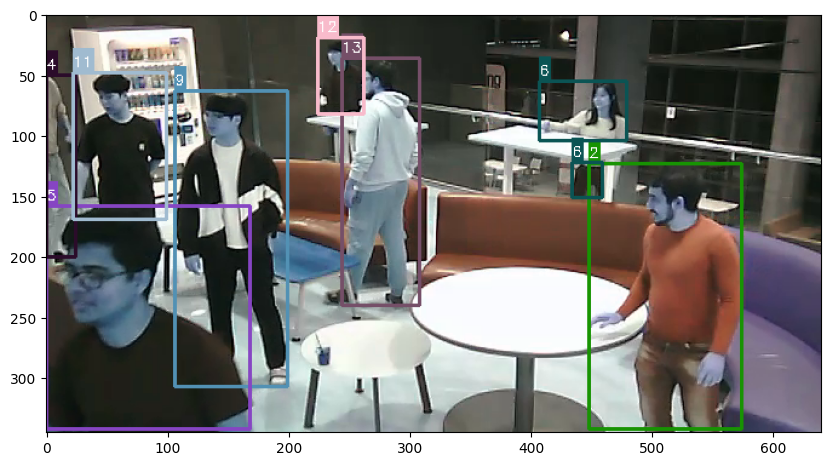

In [12]:
imgs = data['images']
number = 155
file_name = imgs[number]['file_name']
print(file_name)
file_name = f'./datasets/{file_name}'

image = cv2.imread(file_name)
H, W , _ = image.shape
print(f"W = {W}, H = {H}")

anno = data['annotations']
anno_0 = []
for a in anno:
    if a['image_id']==number:
        anno_0.append(a)


for a in anno_0:
    id = a['category_id']
    bbox = a['bbox']
    x, y, w, h = bbox
    
    x_end = x+w
    y_end = y+h
    
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), color[id], 2)
    
    (w, h), _ = cv2.getTextSize(f"{id}", cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)

    # Prints the text.    
    cv2.rectangle(image, (x, y - 20), (x + w, y), color[id], -1)
    cv2.putText(image, f"{id}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)
    

## For yolo format

In [13]:
img_path = 'datasets/remove_people/images/re_36.png'
label_path = img_path.replace('images','labels').replace('png', 'txt')

image shape: (345, 640, 3)
['2 0.7984375 0.6739130434782609 0.196875 0.6347826086956522\n', '13 0.43125 0.4 0.1 0.591304347826087\n', '9 0.23828125 0.5362318840579711 0.1453125 0.7072463768115942\n', '12 0.3796875 0.1463768115942029 0.059375 0.1826086956521739\n', '4 0.01875 0.36231884057971014 0.0375 0.43478260869565216\n', '11 0.09453125 0.3144927536231884 0.1203125 0.3507246376811594\n']
2 0.7984375 0.6739130434782609 0.196875 0.6347826086956522
448 123 574 342
13 0.43125 0.4 0.1 0.591304347826087
244 36 308 240
9 0.23828125 0.5362318840579711 0.1453125 0.7072463768115942
106 63 199 307
12 0.3796875 0.1463768115942029 0.059375 0.1826086956521739
224 19 262 82
4 0.01875 0.36231884057971014 0.0375 0.43478260869565216
0 50 24 200
11 0.09453125 0.3144927536231884 0.1203125 0.3507246376811594
21 48 99 169


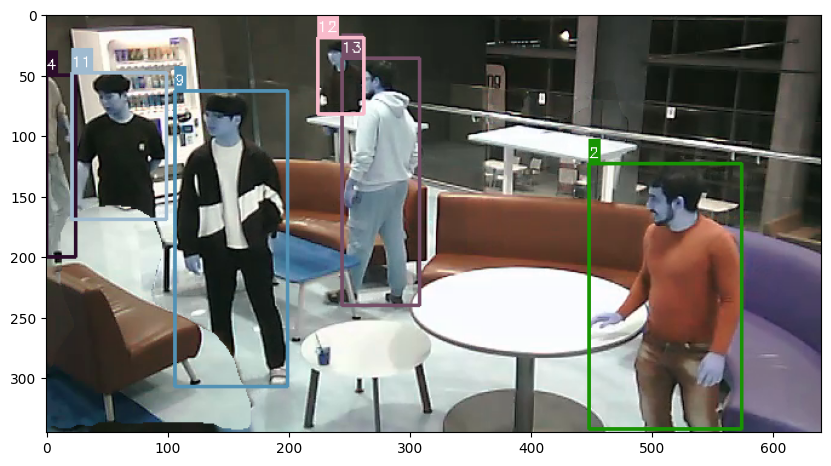

In [14]:

# 이미지 로드
image = cv2.imread(img_path)
H, W, _ = image.shape
print(f"image shape: {image.shape}")

# bounding box 좌표
f = open(label_path, 'r')     # mode = 부분은 생략해도 됨
lines = f.readlines()
print(lines)

for line in lines:
    line = line.strip()
    id, x_c, y_c, w, h = line.split(" ")
    print(id,x_c,y_c,w,h)
    
    id = int(id)
    x_c = float(x_c)
    y_c = float(y_c)
    w = float(w)
    h = float(h)
    
    x = int(W* (x_c - w/2) )
    y = int(H* (y_c - h/2))
    x_end = int(W*(x_c + w/2))
    y_end = int(H*(y_c + h/2))

    print(x,y, x_end, y_end)
    # bounding box 그리기
    cv2.rectangle(image, (x, y), (x_end, y_end), color[id], 2)
    
    (w, h), _ = cv2.getTextSize(
            f"{id}", cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)

    # Prints the text.    
    cv2.rectangle(image, (x, y - 20), (x + w, y), color[id], -1)
    cv2.putText(image, f"{id}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)